In [1]:
import pandas as pd 
from prophet import Prophet
import matplotlib.pyplot as plt

In [2]:
date_rng = pd.date_range(start='2022-01-01',end='2022-12-31',freq='D')
data = {'ds':date_rng,
        'y':range(1,len(date_rng)+1)}
df = pd.DataFrame(data)

In [8]:
df.tail()

,ds,y
360,2022-12-27,361
361,2022-12-28,362
362,2022-12-29,363
363,2022-12-30,364
364,2022-12-31,365


In [6]:
model = Prophet()
model.fit(df)

22:14:20 - cmdstanpy - INFO - Chain [1] start processing
22:14:21 - cmdstanpy - INFO - Chain [1] done processing


In [7]:
future_dates = model.make_future_dataframe(periods=365)
print(future_dates.tail())

            ds
725 2023-12-27
726 2023-12-28
727 2023-12-29
728 2023-12-30
729 2023-12-31


In [9]:
forecast = model.predict(future_dates)

In [12]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
725,2023-12-27,725.999924,725.964766,726.031209
726,2023-12-28,726.999927,726.964271,727.031409
727,2023-12-29,727.999926,727.964089,728.031348
728,2023-12-30,728.999916,728.964390,729.031309
729,2023-12-31,729.999915,729.963856,730.031596


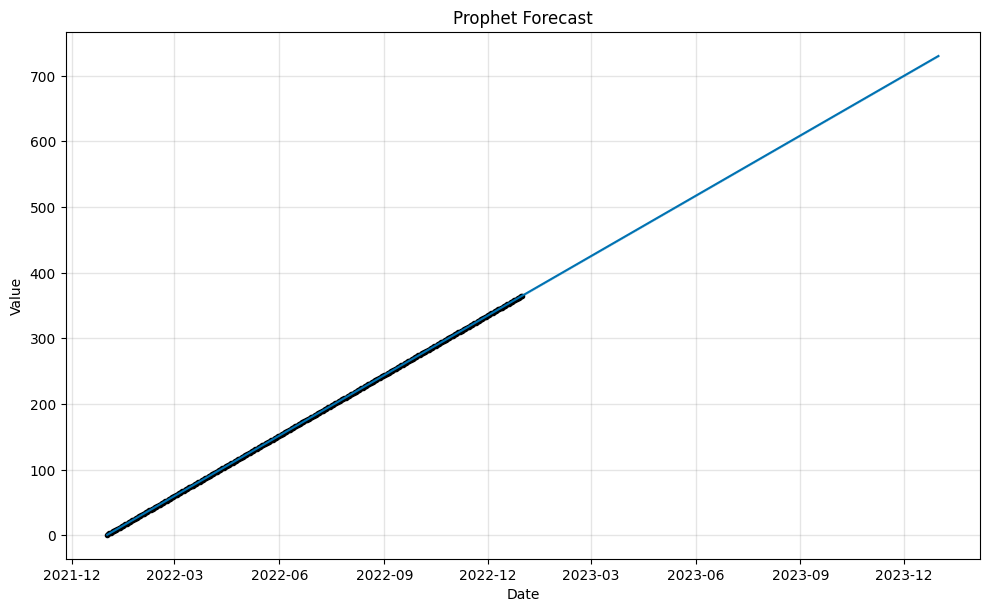

In [13]:
fig = model.plot(forecast,xlabel='Date',ylabel='Value')
plt.title('Prophet Forecast')
plt.show()